In [649]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, MaxPooling1D, Flatten
from keras.models import Sequential
import os
from keras.layers import Dense, Activation, LSTM, Dropout
import joblib
# import rc
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# how to use .h5 file
# https://www.tensorflow.org/tutorials/keras/save_and_load


import warnings
warnings.filterwarnings('ignore')

In [650]:
# 모든 데이터를 합친 데이터(정리된 데이터)
data = pd.read_csv('data/merge_all/merge_all.csv')

In [651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   거래년월일           8370 non-null   object 
 1   자동차용 경유 가격 (원)  8370 non-null   float64
 2   전월비(%)          8370 non-null   float64
 3   평균              8370 non-null   float64
 4   거래량             8370 non-null   float64
dtypes: float64(4), object(1)
memory usage: 327.1+ KB


In [652]:
# print(data.corr(method='kendall'))
# print(data.corr(method='spearman'))
# print(data.corr(method='pearson'))

In [653]:
# 데이터 나누기
X = data[['자동차용 경유 가격 (원)', '전월비(%)', '거래량']]
y = data['평균']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    


In [654]:
import statsmodels.formula.api as sm

In [655]:
data

,거래년월일,자동차용 경유 가격 (원),전월비(%),평균,거래량
0,2000-01-01,583.35,4.0,5600.0,102285.0
1,2000-01-02,583.35,4.0,5600.0,102285.0
2,2000-01-03,583.35,4.0,5600.0,102285.0
3,2000-01-04,583.35,4.0,5600.0,715338.0
4,2000-01-05,583.35,4.0,5620.0,340568.0
...,...,...,...,...,...
8365,2022-11-26,1879.15,-8.0,5664.0,296250.0
8366,2022-11-27,1879.15,-8.0,5664.0,201478.0
8367,2022-11-28,1879.15,-8.0,5664.0,201478.0
8368,2022-11-29,1879.15,-8.0,5592.0,77130.0


In [656]:
# 회귀분석
osl_col = ['year','oil_price', 'rate', 'baechue_mean', 'trading']
osl_data = data
osl_data.columns = osl_col
r = sm.ols(formula='baechue_mean ~ oil_price + rate + trading', data=osl_data).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           baechue_mean   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     679.6
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:39:09   Log-Likelihood:                -80846.
No. Observations:                8370   AIC:                         1.617e+05
Df Residuals:                    8366   BIC:                         1.617e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2261.2497    160.025     14.131      0.000    1947.560    2574.939
oil_price      3.4640      0.112     30.870      0.000       3.244       3.684
rate         277.8875      8.159     34.058      0.000     261.894     293.882
trading    -8.849e-05      0.000     -0.867      0.386      -0.000       0.000
==============================================================================
Omnibus:                     3447.579   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23739.442
Skew:                           1.828   Prob(JB):                         0.00
Kurtosis:                      10.396   Cond. No.                     2.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [658]:
# 데이터 정규화 하기
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1)) # 2차원으로 만들어주기
y_test = scaler_y.transform(y_test.values.reshape(-1,1))

In [659]:
# 모델 만들기
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [660]:
# 예측
y_pred = xgb_model.predict(X_test)
        
# 평가
print('MSE :', mean_squared_error(y_test, y_pred))
#print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
#print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))
#print('MSLE :', mean_squared_log_error(y_test, y_pred))

MSE : 0.0949559867211224
R2 : 0.9061447342509339


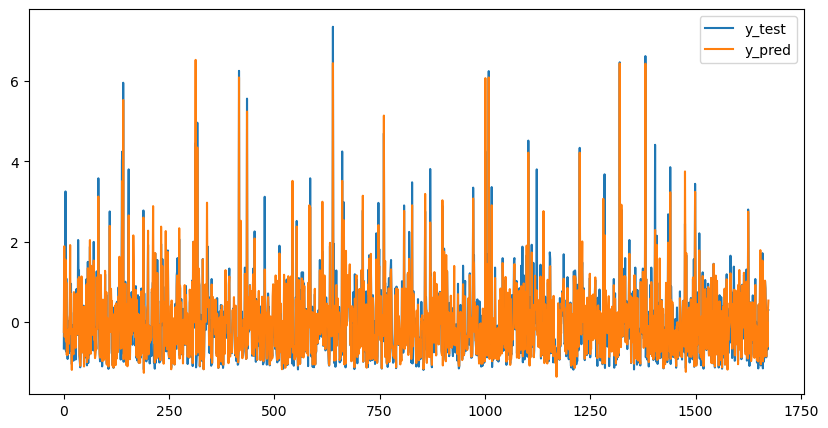

In [661]:
# 예측값과 실제값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

In [662]:
# 모델 저장
joblib.dump(xgb_model, 'model/xgboost_hy.pkl')

['model/xgboost_hy.pkl']

In [663]:
# 모델 불러오기
model_1 = joblib.load('model/xgboost_hy.pkl')

# 모델 예측
test_pre = model_1.predict(X_test)

In [664]:
test_pre

array([-0.2417494 ,  1.8887907 , -0.3626038 , ..., -0.61434317,
        0.31433567,  0.5371755 ], dtype=float32)

In [665]:
# 역정규화 
scaler_y.inverse_transform(test_pre.reshape(-1,1))

array([[ 5747.2163],
       [14741.404 ],
       [ 5237.023 ],
       ...,
       [ 4174.292 ],
       [ 8094.759 ],
       [ 9035.488 ]], dtype=float32)

#

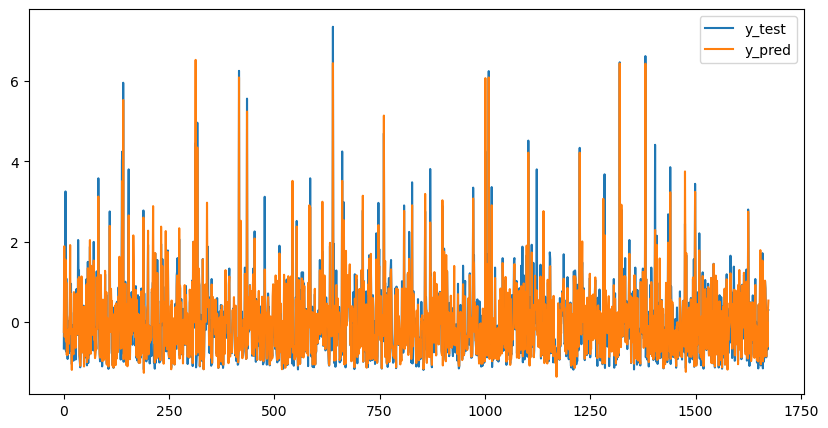

In [666]:
# 예측값과 실제값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='y_test')
plt.plot(test_pre, label='y_pred')
plt.legend()
plt.show()

In [667]:
# 저장된 모델로 예측해보기
# 
pred_x2 = scaler_x.transform([[1865.56,-1.3,78194.0]]) 
pre_1 = model_1.predict(pred_x2)

In [668]:
# 역정규화 하기
# 실제값 : 22100.0| x: 1203.04,14.2,,1080486.0
# 실제값 : 12050.0| x : 1865.56,-1.3,78194.0
scaler_y.inverse_transform(pre_1.reshape(-1,1))

array([[11756.774]], dtype=float32)

LSTM 예측 모델 만들기

In [422]:
df = data
# scaler = MinMaxScaler()
# scale_cols = ['자동차용 경유 가격 (원)', '전월비(%)', '거래량']
# df_scaled = scaler.fit_transform(df[scale_cols])
# df_scaled = pd.DataFrame(df_scaled)
# df_scaled.columns = scale_cols

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   거래년월일           8370 non-null   object 
 1   자동차용 경유 가격 (원)  8370 non-null   float64
 2   전월비(%)          8370 non-null   float64
 3   평균              8370 non-null   float64
 4   거래량             8370 non-null   float64
dtypes: float64(4), object(1)
memory usage: 327.1+ KB


In [423]:
df.isnull().sum()

거래년월일             0
자동차용 경유 가격 (원)    0
전월비(%)            0
평균                0
거래량               0
dtype: int64

In [424]:
# 정규화 하는 코드
# def normalize_data(dataset):
#     cols = dataset.columns.tolist()
#     col_name = [0]*len(cols)
#     for i in range(len(cols)):
#         col_name[i] = i
#     dataset.columns = col_name
#     dtypes = dataset.dtypes.tolist()
#     minmax = list()
#     for column in dataset:
#         dataset = dataset.astype({column: 'float32'})
#     for i in range(len(cols)):
#         col_values = dataset[col_name[i]]
#         value_min = min(col_values)
#         value_max = max(col_values)
#         minmax.append([value_min, value_max])
#     for column in dataset:
#         values = dataset[column].values
#         for i in range(len(values)):
#             values[i] = (values[i] - minmax[column][0]) / (minmax[column][1] - minmax[column][0])
#         dataset[column] = values
#     dataset[column] = values
#     return dataset,minmax
    
# dataset,minmax = normalize_data(df)
# print(df.values)
# values = dataset.values

In [425]:
# 시퀀스를 데이터 세트로 변환 x 와 y 값 분리 하고 학습 
# def split_sequences(sequence, n_steps):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         end_ix = i + n_steps
#         if end_ix > len(sequence)-1:
#             break
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)
    
# def data_setup(n_steps, n_seq,sequence):
#     X, y = split_sequences(sequence, n_steps)
#     n_features = X.shape[2]
#     X = X.reshape((len(X),n_steps, n_features))
#     new_y = []
#     for term in y:
#         new_term = term[-1]
#         new_y.append(new_term)
#     return X, np.array(new_y), n_features
    
# n_steps = 10
# n_seq = 10000
# rel_test_len = 0.1
# X,y,n_features = data_setup(n_steps,n_seq,values)
# X = X[:-1]
# y = y[1:]
# X_test,y_test = X[:int(len(X)*rel_test_len)],y[:int(len(X)*rel_test_len)]
# X_train,y_train = X[int(len(X)*rel_test_len):],y[int(len(X)*rel_test_len):]
# X.shape

In [603]:
lstm_df = data
lstm_df

,거래년월일,자동차용 경유 가격 (원),전월비(%),평균,거래량
0,2000-01-01,583.35,4.0,5600.0,102285.0
1,2000-01-02,583.35,4.0,5600.0,102285.0
2,2000-01-03,583.35,4.0,5600.0,102285.0
3,2000-01-04,583.35,4.0,5600.0,715338.0
4,2000-01-05,583.35,4.0,5620.0,340568.0
...,...,...,...,...,...
8365,2022-11-26,1879.15,-8.0,6100.0,296250.0
8366,2022-11-27,1879.15,-8.0,6100.0,296250.0
8367,2022-11-28,1879.15,-8.0,5664.0,201478.0
8368,2022-11-29,1879.15,-8.0,5592.0,77130.0


In [604]:
# lstm_df 에서 전월비(%) 칼럼 제거
lstm_df = lstm_df.drop(['전월비(%)'], axis=1)
lstm_df

,거래년월일,자동차용 경유 가격 (원),평균,거래량
0,2000-01-01,583.35,5600.0,102285.0
1,2000-01-02,583.35,5600.0,102285.0
2,2000-01-03,583.35,5600.0,102285.0
3,2000-01-04,583.35,5600.0,715338.0
4,2000-01-05,583.35,5620.0,340568.0
...,...,...,...,...
8365,2022-11-26,1879.15,6100.0,296250.0
8366,2022-11-27,1879.15,6100.0,296250.0
8367,2022-11-28,1879.15,5664.0,201478.0
8368,2022-11-29,1879.15,5592.0,77130.0


In [605]:
lstm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   거래년월일           8370 non-null   object 
 1   자동차용 경유 가격 (원)  8370 non-null   float64
 2   평균              8370 non-null   float64
 3   거래량             8370 non-null   float64
dtypes: float64(3), object(1)
memory usage: 261.7+ KB


In [606]:
def get_median(data):
    data = sorted(data)
 
    centerIndex = len(data)//2
    return (data[centerIndex ] + data[-centerIndex - 1])/2

In [607]:
# 배추 가격을 3일, 5일 이동평균값으로 추가
lstm_df['3일이동평균']= lstm_df['평균'].rolling(3).mean()
lstm_df['5일이동평균']= lstm_df['평균'].rolling(5).mean()

In [608]:
lstm_df

,거래년월일,자동차용 경유 가격 (원),평균,거래량,3일이동평균,5일이동평균
0,2000-01-01,583.35,5600.0,102285.0,NaN,NaN
1,2000-01-02,583.35,5600.0,102285.0,NaN,NaN
2,2000-01-03,583.35,5600.0,102285.0,5600.000000,NaN
3,2000-01-04,583.35,5600.0,715338.0,5600.000000,NaN
4,2000-01-05,583.35,5620.0,340568.0,5606.666667,5604.0
...,...,...,...,...,...,...
8365,2022-11-26,1879.15,6100.0,296250.0,6100.000000,6132.0
8366,2022-11-27,1879.15,6100.0,296250.0,6100.000000,6100.0
8367,2022-11-28,1879.15,5664.0,201478.0,5954.666667,6012.8
8368,2022-11-29,1879.15,5592.0,77130.0,5785.333333,5911.2


In [609]:
lstm_df['3일이동평균'] = lstm_df['3일이동평균'].fillna(get_median([lstm_df['평균'][2], lstm_df['평균'][3], lstm_df['평균'][4]]))
lstm_df['5일이동평균'] = lstm_df['5일이동평균'].fillna(get_median([lstm_df['평균'][4], lstm_df['평균'][5], lstm_df['평균'][6],
                                                       lstm_df['평균'][7], lstm_df['평균'][8]]))

                자동차용 경유 가격 (원)        평균       거래량    3일이동평균    5일이동평균
자동차용 경유 가격 (원)        1.000000  0.288298  0.005701  0.288948  0.289567
평균                    0.288298  1.000000 -0.023051  0.997025  0.992660
거래량                   0.005701 -0.023051  1.000000 -0.019505 -0.017538
3일이동평균                0.288948  0.997025 -0.019505  1.000000  0.998198
5일이동평균                0.289567  0.992660 -0.017538  0.998198  1.000000


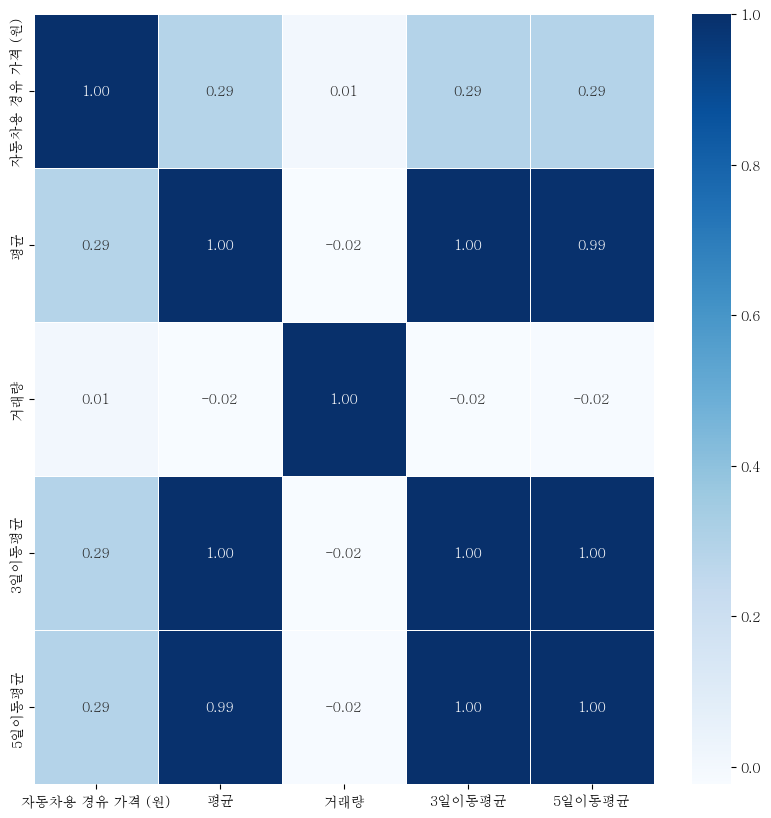

In [611]:
print(lstm_df.corr(method='pearson'))

# 상관관계 시각화
plt.figure(figsize=(10,10))
sns.heatmap(lstm_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()


In [563]:
# 정규화 작업(date 를 제외한 항목을 제외한 숫자로 표현되는 모든 column에 대해 0~1 값으로 정규화 작업을 수행)
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scale_cols1 = ['자동차용 경유 가격 (원)', '거래량', '3일이동평균', '5일이동평균'] #정규화 대상 column 정의
scale_cols2 = ['평균']
scaled_df1 = scaler.fit_transform(lstm_df[scale_cols1]) # 정규화 수행
print(type(scaled_df1), '\n') # 리턴값 확인하면 numpy.ndarray임을 알 수 있음 -> 데이터프레임으로 변환해서 사용해야함
scaled_df2 = scaler.fit_transform(lstm_df[scale_cols2]) # 정규화 수행
print(type(scaled_df2), '\n')

# 정규화된 데이터를 데이터프레임으로 변환
scaled_df1 = pd.DataFrame(scaled_df1, columns=scale_cols1) #정규화된 새로운 dataframe 생성
scaled_df2= pd.DataFrame(scaled_df2, columns=scale_cols2) #정규화된 새로운 dataframe 생성
print(scaled_df1)
print(scaled_df2)

<class 'numpy.ndarray'> 

<class 'numpy.ndarray'> 

      자동차용 경유 가격 (원)       거래량    3일이동평균    5일이동평균
0          -1.889766 -1.064609 -0.277644 -0.254523
1          -1.889766 -1.064609 -0.277644 -0.254523
2          -1.889766 -1.064609 -0.277644 -0.254523
3          -1.889766  0.489666 -0.277644 -0.254523
4          -1.889766 -0.460489 -0.276064 -0.277335
...              ...       ...       ...       ...
8365        1.616293 -0.572849 -0.159102 -0.151869
8366        1.616293 -0.572849 -0.159102 -0.159473
8367        1.616293 -0.813125 -0.193558 -0.180194
8368        1.616293 -1.128384 -0.233705 -0.204336
8369        1.616293 -1.020246 -0.301511 -0.245113

[8370 rows x 4 columns]
            평균
0    -0.277001
1    -0.277001
2    -0.277001
3    -0.277001
4    -0.272270
...        ...
8365 -0.158730
8366 -0.158730
8367 -0.261863
8368 -0.278894
8369 -0.361683

[8370 rows x 1 columns]


In [564]:
# 딥러닝 학습을 위한 입력데이터 feature column , 정답데이터 column 정의 후 numpy 로 변환하여 데이터 전처리 과정 완료하기
feature_cols = ['자동차용 경유 가격 (원)', '거래량', '3일이동평균', '5일이동평균'] #feature 정의(입력데이터)
label_cols = ['평균'] #label 정의(정답데이터)

feature_df = pd.DataFrame(scaled_df1, columns=feature_cols)  #feature 데이터프레임 생성
label_df = pd.DataFrame(scaled_df2, columns=label_cols) #label 데이터프레임 생성

print(feature_df)
print(label_df)

# 딥러닝 학습을 위해 dataframe 에서 numpy 로 변환
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

      자동차용 경유 가격 (원)       거래량    3일이동평균    5일이동평균
0          -1.889766 -1.064609 -0.277644 -0.254523
1          -1.889766 -1.064609 -0.277644 -0.254523
2          -1.889766 -1.064609 -0.277644 -0.254523
3          -1.889766  0.489666 -0.277644 -0.254523
4          -1.889766 -0.460489 -0.276064 -0.277335
...              ...       ...       ...       ...
8365        1.616293 -0.572849 -0.159102 -0.151869
8366        1.616293 -0.572849 -0.159102 -0.159473
8367        1.616293 -0.813125 -0.193558 -0.180194
8368        1.616293 -1.128384 -0.233705 -0.204336
8369        1.616293 -1.020246 -0.301511 -0.245113

[8370 rows x 4 columns]
            평균
0    -0.277001
1    -0.277001
2    -0.277001
3    -0.277001
4    -0.272270
...        ...
8365 -0.158730
8366 -0.158730
8367 -0.261863
8368 -0.278894
8369 -0.361683

[8370 rows x 1 columns]


In [565]:
# 입력 파라미터 feature, label => numpy type 함수로 만들기 
def make_sequene_dataset(feature, label, window_size):
    feature_list = [] # 생성될 feature list
    label_list = [] # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size]) 
        #feature[i:i+window_size] => 2차원 배열, 슬라이싱 이용하여 [[..], [..],..] 형상으로 입력 데이터, feature를 생성함
        label_list.append(label[i+window_size]) # 2차원 행렬의 배열
    
    return np.array(feature_list), np.array(label_list)  # 3차원 배열로 리턴
    #feature_list = [ [..], [..], ..] 이므로 리턴값 np.array(feature_list)는 (batch_size, time steps, input dims형상을 가짐

In [566]:
# 학습데이터 X, Y 생성
window_size = 20 #앞에 40개 데이터를 이용해서 그 다음 정답데이터 label 를 예측한다는 뜻
X, Y = make_sequene_dataset(feature_np, label_np, window_size) #make_sequence_data 함수를 이용해서 X, Y 생성
print(X.shape, Y.shape)

(8350, 20, 4) (8350, 1)


In [567]:
split = -1666 #(전체 데이터에 *20% ) 트레인 데이터, 테스트 데이터 분리

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6684, 20, 4) (6684, 1)
(1666, 20, 4) (1666, 1)


In [589]:
# model = Sequential()
# model.add(LSTM(64, 
#                input_shape=x_train[0].shape, 
#                activation='relu', 
#                return_sequences=False)
#           )
# model.add(Dense(128, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='relu'))
#----------------------------------------------

model = Sequential()
model.add(LSTM(64, activation='tanh', #LSTM 레이어에서 tanh 를 활성화 함수로 가지는 노드 수 128개
               input_shape=x_train[0].shape)) #input_sape=(40, 2) 40개의 데이터를 2개씩 입력받음
model.add(Dropout(0.3)) #Dropout 레이어에서 30% 노드를 랜덤하게 제거
model.add(Dense(1, activation='linear'))

model.summary()
#----------------------------------------------
# model = Sequential([
#     # 1차원 feature map 생성
#     Conv1D(filters=32, kernel_size=5,
#            padding="causal",
#            activation="relu",
#            input_shape=x_train[0].shape),
#     Dropout(0.3)
#     # LSTM
#     LSTM(128, activation='tanh'),
#     Dense(64),
#     Dense(32),
#     Dense(16, activation="relu"),
#     Dense(1),
# ])

# model.summary()
#----------------------------------------------
# model = Sequential()
# # LSTM 모델을 만든다
# model.add(LSTM(32, input_shape=x_train[0].shape, return_sequences=True))
# # maxpooling
# model.add(MaxPooling1D(pool_size=2))
# # flatten
# model.add(Flatten())
# model.add(Dense(1))
# model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 64)                17664     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [590]:
#모델 컴파일 및 학습
#조기종료 셋팅  : EarlyStopping
#checkpoint 셋팅 : ModelCheckpoint 사용

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) #metrics 관찰대상(mae = 평균절대오차값)
early_stop = EarlyStopping(monitor='val_loss', patience=10) #val_loss 가 5번 이상 개선되지 않으면 학습 중단
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, callbacks=[early_stop])
#----------------------------------------------
# model.compile(loss='mean_squared_error', optimizer='adam')
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# model_path = 'model'
# filename = os.path.join(model_path, 'lstm_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# history = model.fit(x_train, y_train, epochs=200, batch_size=64,
#                     validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
105/105 [==============================] - 7s 34ms/step - loss: 0.1030 - mae: 0.2067 - val_loss: 0.1758 - val_mae: 0.2235
Epoch 2/100
105/105 [==============================] - 3s 27ms/step - loss: 0.0362 - mae: 0.1325 - val_loss: 0.1261 - val_mae: 0.1978
Epoch 3/100
105/105 [==============================] - 2s 21ms/step - loss: 0.0318 - mae: 0.1224 - val_loss: 0.0941 - val_mae: 0.1819
Epoch 4/100
105/105 [==============================] - 2s 22ms/step - loss: 0.0264 - mae: 0.1119 - val_loss: 0.0847 - val_mae: 0.1751
Epoch 5/100
105/105 [==============================] - 2s 21ms/step - loss: 0.0264 - mae: 0.1097 - val_loss: 0.0737 - val_mae: 0.1650
Epoch 6/100
105/105 [==============================] - 2s 19ms/step - loss: 0.0246 - mae: 0.1046 - val_loss: 0.0741 - val_mae: 0.1635
Epoch 7/100
105/105 [==============================] - 3s 24ms/step - loss: 0.0238 - mae: 0.1023 - val_loss: 0.0782 - val_mae: 0.1600
Epoch 8/100
105/105 [==============================] - 4s 40ms

53/53 [==============================] - 2s 11ms/step


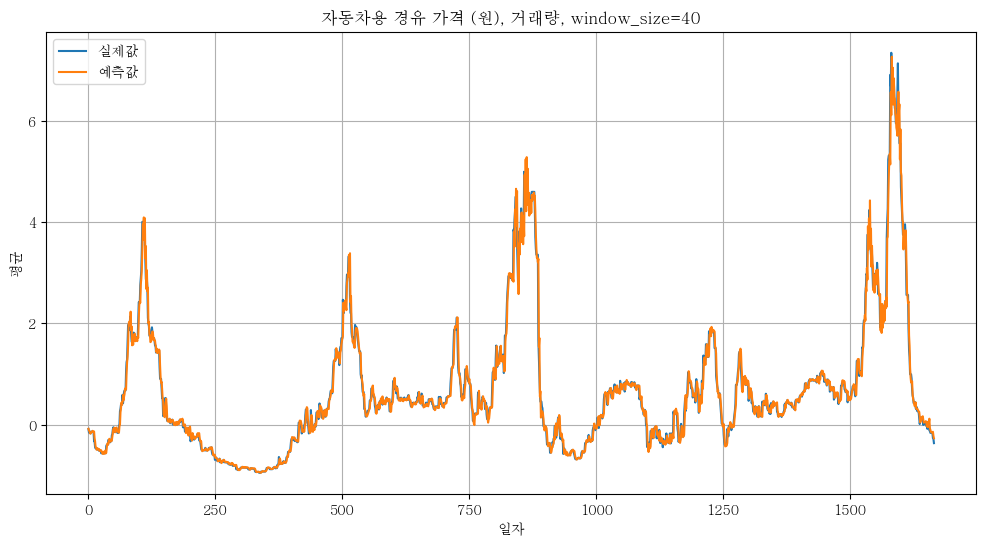

In [591]:
# 주가 예측
pred = model.predict(x_test) 

plt.figure(figsize=(12, 6))
plt.title('자동차용 경유 가격 (원), 거래량, window_size=40')
plt.ylabel('평균')
plt.xlabel('일자')
plt.plot(y_test, label='실제값')
plt.plot(pred, label='예측값')
plt.grid()
plt.legend(loc='best')

plt.show()

In [596]:
#  모델을 평가한다
#  RMSE
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_score = np.sqrt(mean_squared_error(y_train, train_predict))
test_score = np.sqrt(mean_squared_error(y_test, test_predict))
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))
print('R2 :', r2_score(y_test, test_predict))


53/53 [==============================] - 3s 52ms/step
Train Score: 0.08 RMSE
Test Score: 0.18 RMSE
R2 : 0.9824425320920356


In [593]:
# LSTM 모델 저장하기
model.save_weights('lstm_model_hy')

In [594]:
load_model = Sequential()
load_model.add(LSTM(64, activation='tanh', #LSTM 레이어에서 tanh 를 활성화 함수로 가지는 노드 수 128개
               input_shape=x_train[0].shape)) #input_sape=(40, 2) 40개의 데이터를 2개씩 입력받음
load_model.add(Dropout(0.3)) #Dropout 레이어에서 30% 노드를 랜덤하게 제거
load_model.add(Dense(1, activation='linear'))

load_model.load_weights('lstm_model_hy')
load_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 64)                17664     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________
